In [103]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


In [104]:
# Load data
data = pd.read_csv('train.csv')

In [105]:
#splitting data into train and dev
data = np.array(data)
m,n  =data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255
_,m_train = X_train.shape

In [106]:
# Initialize Paramters
def init_params():
    W1 = np.random.rand(10,784) - 0.5
    b1 = np.random.rand(10,1) - 0.5
    W2 = np.random.rand(10,10) - 0.5
    b2 = np.random.rand(10,1) - 0.5
    return W1,b1,W2,b2

# Activation function ReLU
def ReLU(Z):
    return np.maximum(Z, 0)


#Activation function Softmax 
# Usual exp(Z) causing overflow due to value handled by exp is having issues with the value occuring in computation, 
# therefore shifitng the values with respect to its maximum value and calculating because the divide will not be effected due to maximum value subtraction
'''
Example of Z_shifted
Array -> [1000, 1001, 1002, 1002, ....] 
Applying Z_Shift is subtracting maximum value from each element of the array along axis=0 will result in [0,1,2,.....]
'''
def softmax(Z):
    Z_shifted = Z - np.max(Z, axis=0, keepdims=True)  # Shift Z by its max value
    A = np.exp(Z_shifted) / np.sum(np.exp(Z_shifted), axis=0, keepdims=True)
    return A


def forward_prop(W1,b1,W2,b2,X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1,A1,Z2,A2
    
def deriv_ReLU(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max()+1))
    one_hot_Y[np.arange(Y.size),Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def back_prop(Z1,A1,Z2,A2,W1,W2,X,Y):
    m = Y.size
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2


def update_param(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha*dW1
    b1 = b1 - alpha*db1
    W2 = W2 - alpha*dW2
    b2 = b2 - alpha*db2
    return W1, b1, W2, b2


In [107]:

def get_predictions(A2):
    return np.argmax(A2,0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, iterations, alpha):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1,b1,W2,b2,X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_param(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print("Accuracy: ", get_accuracy(predictions, Y))
    return W1, b1, W2, b2


W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 500, 0.10)


Iteration:  0
[0 6 0 ... 6 6 9] [7 6 8 ... 5 8 8]
Accuracy:  0.11236585365853659
Iteration:  10
[8 7 0 ... 5 0 9] [7 6 8 ... 5 8 8]
Accuracy:  0.18385365853658536
Iteration:  20
[8 6 8 ... 0 0 9] [7 6 8 ... 5 8 8]
Accuracy:  0.22963414634146342
Iteration:  30
[8 6 8 ... 5 0 9] [7 6 8 ... 5 8 8]
Accuracy:  0.27770731707317076
Iteration:  40
[8 6 8 ... 5 0 9] [7 6 8 ... 5 8 8]
Accuracy:  0.3432926829268293
Iteration:  50
[8 6 8 ... 5 0 9] [7 6 8 ... 5 8 8]
Accuracy:  0.42973170731707316
Iteration:  60
[8 6 8 ... 7 8 9] [7 6 8 ... 5 8 8]
Accuracy:  0.4950731707317073
Iteration:  70
[8 6 8 ... 7 8 9] [7 6 8 ... 5 8 8]
Accuracy:  0.5425121951219513
Iteration:  80
[8 6 8 ... 7 8 9] [7 6 8 ... 5 8 8]
Accuracy:  0.5780487804878048
Iteration:  90
[8 6 8 ... 7 8 9] [7 6 8 ... 5 8 8]
Accuracy:  0.6060731707317073
Iteration:  100
[8 6 8 ... 7 8 9] [7 6 8 ... 5 8 8]
Accuracy:  0.6291707317073171
Iteration:  110
[8 6 8 ... 7 8 9] [7 6 8 ... 5 8 8]
Accuracy:  0.650219512195122
Iteration:  120
[8 6 8 

In [108]:
def make_predictions(X,W1,b1,W2,b2):
    _,_,_,A2 = forward_prop(W1,b1,W2,b2,X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:,index, None]
    prediction = make_predictions(X_train[:,index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print('Prediction: ',prediction)
    print("Label: ",label)

    current_image = current_image.reshape((28,28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()


Prediction:  [9]
Label:  9


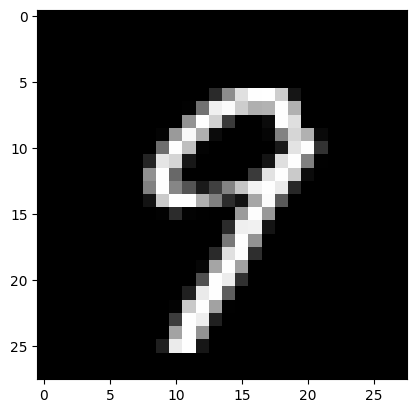

In [109]:
test_prediction(3, W1, b1, W2, b2)